# Lab Activity/Homework week 4 (20pts)
We will continue exploring how we use statistics in the analysis of data.

### Step 1: import the needed libraries (participation in lab Steps 1-4: 3pts, and class work: 2pts)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests

### Step 2: import and prepare data from our Etcheverry sensor system

We will use radiation data like we've seen before, but we are also going to take a look at some weather data:
* "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof.csv"
* "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof_weather.csv"

#### Step 2.a: make methods for importing this data so we don't have to write all of the steps every time we want to import new data.

In [2]:
def get_web_data(url):
    header = {
      "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
      "X-Requested-With": "XMLHttpRequest"
    }
    s = requests.get(url, headers=header).text
    data = pd.read_csv(io.StringIO(s))
    return data

#### Step 2.b: Execute those methods for the two sets of data listed at the above urls and verify that the output makes sense.

In [3]:
url = "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof_weather.csv"
weather_data = get_web_data(url)
weather_data

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag
0,2020-02-24 23:15:40+00:00,2020-02-24 15:15:40-08:00,1.582586e+09,20.38,1011.90,42.60,NaN
1,2020-02-24 23:10:40+00:00,2020-02-24 15:10:40-08:00,1.582586e+09,20.36,1011.85,42.26,NaN
2,2020-02-24 23:05:40+00:00,2020-02-24 15:05:40-08:00,1.582586e+09,20.33,1011.86,42.19,NaN
3,2020-02-24 23:00:46+00:00,2020-02-24 15:00:46-08:00,1.582585e+09,20.33,1011.92,42.03,NaN
4,2020-02-24 23:00:40+00:00,2020-02-24 15:00:40-08:00,1.582585e+09,20.33,1011.92,42.03,NaN
...,...,...,...,...,...,...,...
161443,2020-09-20 17:00:43+0000,2020-09-20 10:00:43-0700,1.600621e+09,21.55,999.79,64.05,0.0
161444,2020-09-20 17:05:43+0000,2020-09-20 10:05:43-0700,1.600622e+09,21.49,999.80,64.06,0.0
161445,2020-09-20 17:10:43+0000,2020-09-20 10:10:43-0700,1.600622e+09,21.75,999.79,63.47,0.0
161446,2020-09-20 17:15:43+0000,2020-09-20 10:15:43-0700,1.600622e+09,21.83,999.79,63.35,0.0


#### Step 2.c: Cut down the data - focus on the weather data for now
* Keep only the relevant columns (time, temperature, humidity, pressure)
* Select only the last month

In [4]:
weather_data_cut = weather_data.loc[:,"deviceTime_local":"humidity"]
time_mask = weather_data_cut['deviceTime_local']>'2020-08-17 00:00:00:-07:00'
weather_month = weather_data_cut[time_mask]
weather_month

,deviceTime_local,deviceTime_unix,temperature,pressure,humidity
151535,2020-08-17 00:00:52-0700,1.597648e+09,24.39,1000.46,57.85
151536,2020-08-17 00:05:51-0700,1.597648e+09,24.30,1000.26,57.83
151537,2020-08-17 00:10:52-0700,1.597648e+09,23.88,1000.13,59.31
151538,2020-08-17 00:15:51-0700,1.597649e+09,24.38,1000.02,58.19
151539,2020-08-17 00:20:51-0700,1.597649e+09,24.61,999.93,57.50
...,...,...,...,...,...
161443,2020-09-20 10:00:43-0700,1.600621e+09,21.55,999.79,64.05
161444,2020-09-20 10:05:43-0700,1.600622e+09,21.49,999.80,64.06
161445,2020-09-20 10:10:43-0700,1.600622e+09,21.75,999.79,63.47
161446,2020-09-20 10:15:43-0700,1.600622e+09,21.83,999.79,63.35


### Step 3: plotting the data in different ways

We will now plot the data as time series and histograms and explore some properties of the data further.

#### Step 3.a: Plot the temperature vs time and humidity vs time

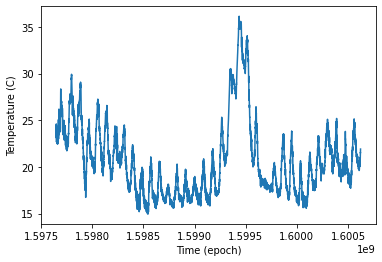

In [5]:
plt.plot(weather_month['deviceTime_unix'].values,weather_month['temperature'].values)
plt.ylabel("Temperature (C)")
plt.xlabel("Time (epoch)")
plt.show()

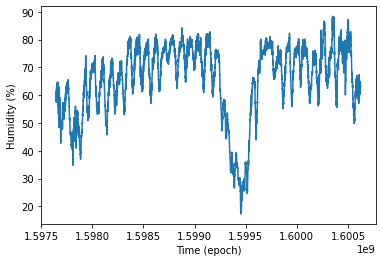

In [6]:
plt.plot(weather_month['deviceTime_unix'].values,weather_month['humidity'].values)
plt.ylabel("Humidity (%)")
plt.xlabel("Time (epoch)")
plt.show()

#### Step 3.b: Plot the temperature and humidity as histograms

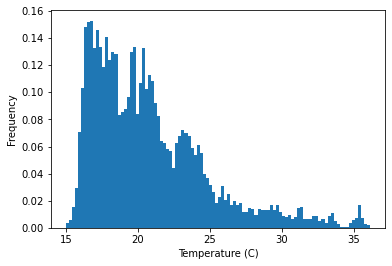

In [7]:
plt.hist(weather_month['temperature'].values, density=True, bins=100)
plt.ylabel("Frequency")
plt.xlabel("Temperature (C)")
plt.show()

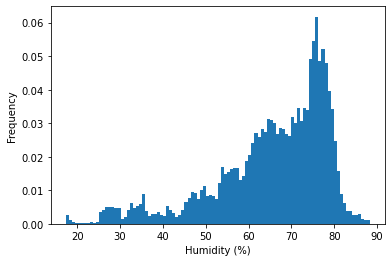

In [8]:
plt.hist(weather_month['humidity'].values, density=True, bins=100)
plt.ylabel("Frequency")
plt.xlabel("Humidity (%)")
plt.show()

#### Step 3.c: Plot these same histograms with cuts on the range of temperatures and humidities

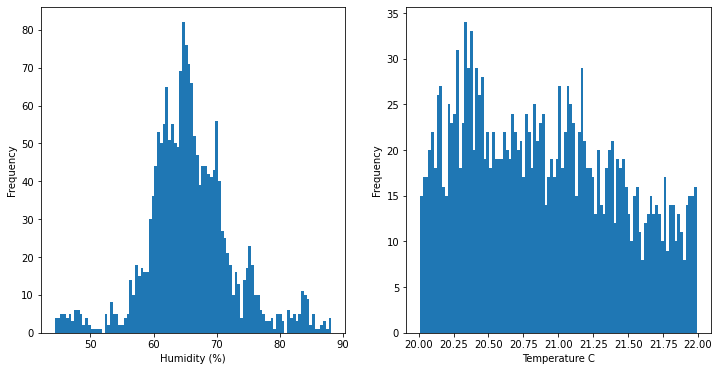

In [9]:
t_low = 20
t_high = 22

cut_data = weather_month[(weather_month['temperature'] > t_low) & (weather_month['temperature'] < t_high)]
fig = plt.figure(1, figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(cut_data["humidity"].values,bins=100)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Humidity (%)")

ax2.hist(cut_data["temperature"].values,bins=100)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Temperature C")

plt.show()

#### Step 3.d: Plot temperature vs humidity as a scatter plot, try zooming in on a subset of the data as well

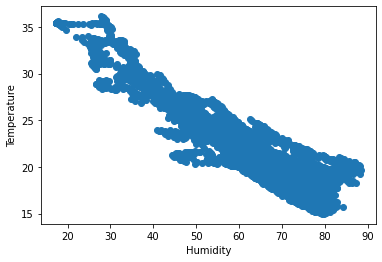

In [10]:
plt.scatter(weather_month['humidity'].values,weather_month['temperature'].values)
plt.ylabel("Temperature")
plt.xlabel("Humidity")
plt.show()

#### Step 3.e: Try all of this with pressure, comparing this to the other two data types

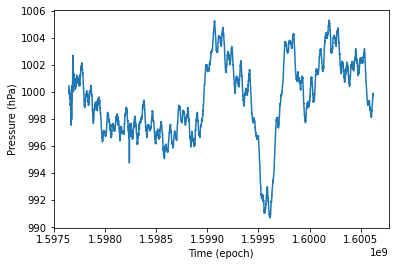

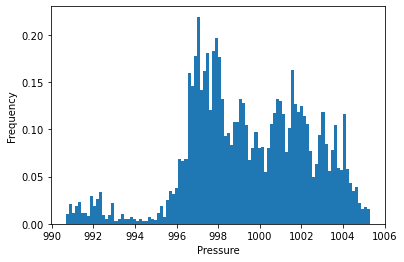

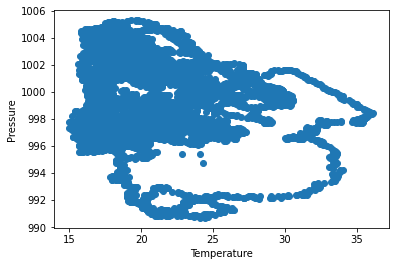

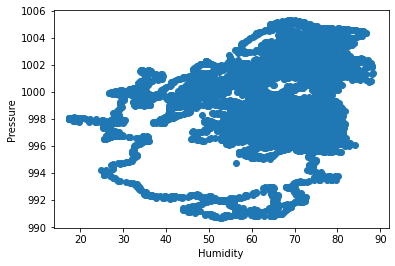

In [11]:
plt.plot(weather_month['deviceTime_unix'].values,weather_month['pressure'].values)
plt.ylabel("Pressure (hPa)")
plt.xlabel("Time (epoch)")
plt.show()

plt.hist(weather_month['pressure'].values, density=True, bins=100)
plt.ylabel("Frequency")
plt.xlabel("Pressure")
plt.show()

plt.scatter(weather_month['temperature'].values,weather_month['pressure'].values)
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()

plt.scatter(weather_month['humidity'].values,weather_month['pressure'].values)
plt.xlabel("Humidity")
plt.ylabel("Pressure")
plt.show()

### Step 4: Quantifying this relationship

We can define a correlation coeefficient ($\rho$, or $r_{xy}$ to describe how correlated these two variables, Temperature(y) and Humidity(x), are, taking into account the **variance** of in each variable, and the **covariance** - how much the two variable vary together.

$r_{xy} = \frac{Cov(x,y)}{\sigma_{x}\sigma_{y}}$

$r_{xy} = \frac{\sum_{i=0}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})}{\sqrt\sum_{i=0}^{N}(x_{i}-\mu_{x})^{2}\sqrt\sum_{i=0}^{N}(y_{i}-\mu_{y})^{2}}$

This is known as the Pearson correlation - and there is already a statistics library for python that defines this method as `pearsonr`. You can then call this method to look at the correlation between two sets of data (data1 and data2):

    import scipy.stats
    scipy.stats.pearsonr(data1, data2)

#### Step 4.a: Calculate this correlation for humidity vs temperature, pressure vs temperature, and humidity vs pressure

In [12]:
import scipy.stats

r, p = scipy.stats.pearsonr(weather_month['humidity'].values, weather_month['temperature'].values)
print(r,",",p)

-0.9278951622862008 , 0.0


###### NOTE 1: The square of this correlation coefficient is the fraction (%) of all variation in each data set that can be explained by the variation in the other data set.

###### NOTE 2: The second measure of correlation is the statistical significance of the measured correlation coefficient.

The significance can be estimated by the probability that a randomized sampling of the x and y would produce the same correlation coefficient:

1. Randomize the x and y data sets (this will break any real correlation)
2. Measure the correlation for this new set of x and y measurements
3. Do this many times - the probability of getting a correlation strength greater than that measured in the original data indicates how confident we can be that the correlation is real


In [13]:
import random

rand_temp = np.copy(weather_month['temperature'].values)
print(rand_temp)
random.shuffle(rand_temp)
print(rand_temp)

rand_hum = np.copy(weather_month['humidity'].values)
print(rand_hum)
random.shuffle(rand_hum)
print(rand_hum)

scipy.stats.pearsonr(weather_month['humidity'].values, weather_month['temperature'].values)
scipy.stats.pearsonr(rand_hum, rand_temp)



[24.39 24.3  23.88 ... 21.75 21.83 21.92]
[31.26 18.62 16.72 ... 21.15 19.8  15.37]
[57.85 57.83 59.31 ... 63.47 63.35 62.89]
[50.93 34.59 79.84 ... 58.22 77.37 71.49]


(-0.009474318559414632, 0.3455767024581455)

In [14]:

r_press, p_press = scipy.stats.pearsonr(weather_month['humidity'].values, weather_month['pressure'].values)

r_sqr = r_press**2
print(r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_press, p_press))

0.04818301025532931
corr. coeff. = 0.21950628750750925, p-value = 1.9195374970177944e-108


### Step 5: Explore the correlation between the two types of radiation data we have available (8pts)
For this we will look at the "local" copies of this data because of the large size of the d3s data set.
* etch_roof.csv
* etch_roof_d3s.csv

These have been uploaded to the data folder here: 

    /home/user/data/

#### Step 5.a: Import this local data and again cut it down to look at the most recent month (1pt)
###### Note: Pay attention to the number of rows in the resulting DataFrames - they may not be the same

In [16]:
# local path (windows) = r"C:/Users/<my-user-name>/Downloads/"
# local path (mac) = "\Users\<my-user-name>\Downloads\"

data1 = pd.read_csv(r"C:/Users/ahanks/Downloads/etch_roof.csv")

data2 = pd.read_csv(r"C:/Users/ahanks/Downloads/etch_roof_d3s.csv")


In [58]:
time_mask = data1['deviceTime_local']>'2020-08-17 00:00:00:-07:00'
data1_cut = data1[time_mask]
data1_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
321523,2020-08-17 07:00:51+0000,2020-08-17 00:00:51-0700,1.597648e+09,2.0,0.632456,0.0
321524,2020-08-17 07:05:51+0000,2020-08-17 00:05:51-0700,1.597648e+09,3.4,0.824621,0.0
321525,2020-08-17 07:10:51+0000,2020-08-17 00:10:51-0700,1.597648e+09,2.8,0.748331,0.0
321526,2020-08-17 07:15:51+0000,2020-08-17 00:15:51-0700,1.597649e+09,1.8,0.600000,0.0
321527,2020-08-17 07:20:51+0000,2020-08-17 00:20:51-0700,1.597649e+09,3.0,0.774597,0.0
...,...,...,...,...,...,...
330557,2020-09-17 19:00:42+0000,2020-09-17 12:00:42-0700,1.600369e+09,3.2,0.800000,0.0
330558,2020-09-17 19:05:42+0000,2020-09-17 12:05:42-0700,1.600370e+09,1.6,0.565685,0.0
330559,2020-09-17 19:10:42+0000,2020-09-17 12:10:42-0700,1.600370e+09,2.0,0.632456,0.0
330560,2020-09-17 19:15:42+0000,2020-09-17 12:15:42-0700,1.600370e+09,3.8,0.871780,0.0


In [24]:
time_mask = data2['deviceTime_local']>'2020-08-17 00:00:00:-07:00'
data2_cut = data2[time_mask]
data2_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,keV_per_ch,0,1,2,3,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,error_flag
200809,2020-08-17 07:01:09+0000,2020-08-17 00:01:09-0700,1.597648e+09,2323.6,21.557365,2.57,0,0,0,0,...,0,0,0,0,0,1,0,0,72,0.0
200810,2020-08-17 07:06:09+0000,2020-08-17 00:06:09-0700,1.597648e+09,2335.4,21.612034,2.57,0,0,0,0,...,0,0,0,0,0,1,0,0,67,0.0
200811,2020-08-17 07:11:09+0000,2020-08-17 00:11:09-0700,1.597648e+09,2320.8,21.544373,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,63,0.0
200812,2020-08-17 07:16:09+0000,2020-08-17 00:16:09-0700,1.597649e+09,2260.6,21.263114,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,56,0.0
200813,2020-08-17 07:21:09+0000,2020-08-17 00:21:09-0700,1.597649e+09,2274.8,21.329791,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209875,2020-09-17 18:52:16+0000,2020-09-17 11:52:16-0700,1.600369e+09,2301.4,21.454137,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,74,0.0
209876,2020-09-17 18:57:16+0000,2020-09-17 11:57:16-0700,1.600369e+09,2332.0,21.596296,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,72,0.0
209877,2020-09-17 19:02:16+0000,2020-09-17 12:02:16-0700,1.600369e+09,2310.0,21.494185,2.57,0,0,0,0,...,0,0,0,0,0,1,0,0,73,0.0
209878,2020-09-17 19:07:16+0000,2020-09-17 12:07:16-0700,1.600370e+09,2316.4,21.523940,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,68,0.0


#### Step 5.b: Look at the time-series: include the errors on each CPM value (1pt)
###### NOTE: the errors can be calculated if you know the time interval used to calculate each CPM value, but it is also included as one of the columns in these DataFrames.

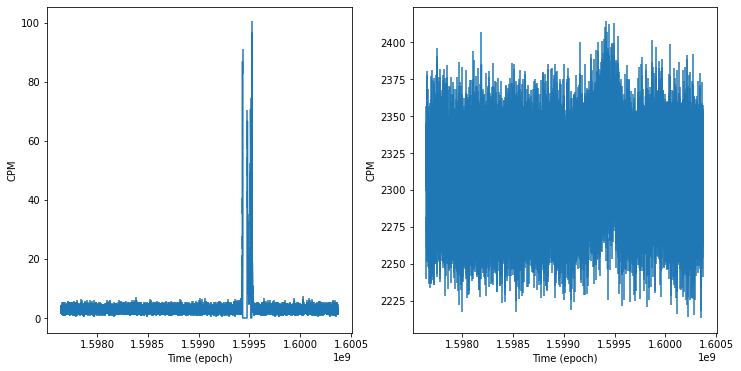

In [26]:
fig = plt.figure(1, figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.errorbar(data1_cut['deviceTime_unix'].values,data1_cut['cpm'].values,data1_cut['cpmError'].values)
ax1.set_xlabel("Time (epoch)")
ax1.set_ylabel("CPM")

ax2.errorbar(data2_cut['deviceTime_unix'].values,data2_cut['cpm'].values,data2_cut['cpmError'].values)
ax2.set_xlabel("Time (epoch)")
ax2.set_ylabel("CPM")

plt.show()

#### Step 5.c: Plot the histograms for each of these data sets (as before) (1pt)

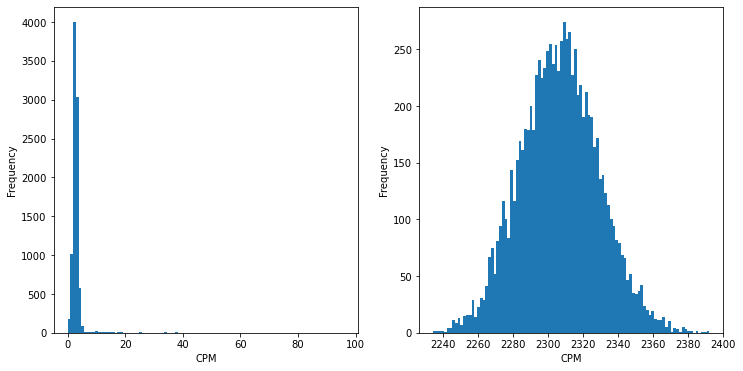

In [38]:
fig = plt.figure(1, figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(data1_cut['cpm'].values,bins=100)
ax1.set_xlabel("CPM")
ax1.set_ylabel("Frequency")

ax2.hist(data2_cut['cpm'].values,bins=100)
ax2.set_xlabel("CPM")
ax2.set_ylabel("Frequency")

plt.show()

### +1 extra for cutting outliers

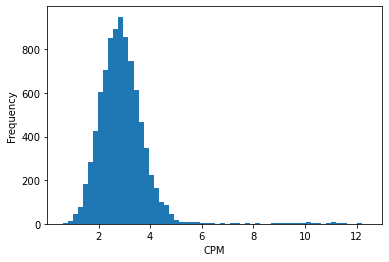

In [62]:
# It looks like we want to cut out those outliers in the forst set of CPM data
# - in the time series we can see that there was a time when the detector was clearly malfunctioning
# - we can use our knowledge of the distribution for this, and cut based on the variance
data1_mean = np.mean(data1_cut['cpm'].values)
data1_std = np.std(data1_cut['cpm'].values)
data1_cut2 = data1_cut.copy()
data_mask = data1_cut2['cpm']<data1_mean+3*data1_std
data1_cut2 = data1_cut2[data_mask]
# zero counts also means the detector is malfunctioning
data_mask = data1_cut2['cpm']>0
data1_cut2 = data1_cut2[data_mask]

plt.hist(data1_cut2['cpm'].values,bins=60)
plt.xlabel("CPM")
plt.ylabel("Frequency")
plt.show()

#### We will import some tools for binning this data to match dates correctly when trying to look at correlations.

In [85]:
import sys
sys.path.append(r'C:/Users/ahanks/E11-git/Activities/')
sys.path.append('.')
import LabMethods

In [99]:
rebin=5
data1_binned, data2_binned = LabMethods.bin_correlation_data(data1_cut2, data2_cut,rebin)

#### Step 5.d: Plot the scatter-plot of these two types of radiation data (as before) (3pts)

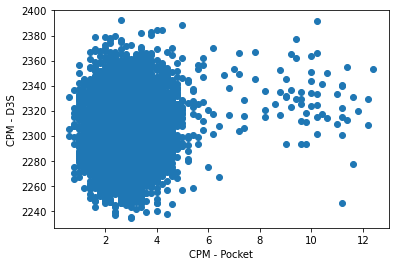

In [100]:
plt.scatter(data1_binned['cpm'],data2_binned['cpm'])
plt.xlabel("CPM - Pocket")
plt.ylabel("CPM - D3S")
plt.show()

#### Step 5.e: Calculate the Pearson correlation between these. Is it significant? (2pts)
* This data is coming from two radiation sensors sitting in the same location. What explanation might there be for the strength or weakness of the correlation that you found?

In [101]:
r_counts, p_counts = scipy.stats.pearsonr(data1_binned['cpm'].values, data2_binned['cpm'].values)

r_sqr = r_counts**2
print("The proportion of the variance in the Pocket Geiger described by the D3S is:",r_sqr)
print("corr. coeff. = {}, p-value = {}".format(r_counts, p_counts))

The proportion of the variance in the Pocket Geiger described by the D3S is: 0.007348259267062019
corr. coeff. = 0.08572198823558644, p-value = 8.120237769472482e-16


This correlation is about as weak as it can be. But the p-value suggests that it is still a significant correlation. We would expect these to be correlated since they are supposed to be measuring the same thing - radiation in the local environment - and they are in the same location.

It is likely that the very week correlation is related to the large relative uncertainties in the counting statistics for the small counting detector (the Pocket Geiger).

If you go back and rebin to combine statistics - say over an hour or two - you can see this directly. The correlation will get stronger as we reduce the intrinsic relative statistical uncertainties for each set of counts.

### Question 1: (3pts)
What probability ditribution - poisson or gaussian (norm) (bonus for trying a binomial) - best describes the CPM data from each sensor?

***Grading note:*** *Looking only at the last month is actually better - you won't be docked for not doing this, however, since I told you not to. Your comparisons will likely differ from mine in this case, however.*

* __Step 1:__ Re-plot the histograms of the two types of radiation data without the selection to only look at the last month.
* __Step 2:__ Plot the functions you want to compare over the data (one at a time in different plots or all together with different line styles)
  * HINT: try plotting on a log-y scale to highlight the tails of your distributions
* __Step 3:__ From these plots, qualitatively determine which distribution you think does the best job of describing each set of data.
* __Step 4:__ If you came to different conclusions for the two sets of data, what do you think is causing this difference?

In [64]:
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm

14.218849477035016


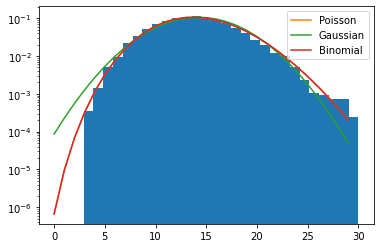

11533.699812589573


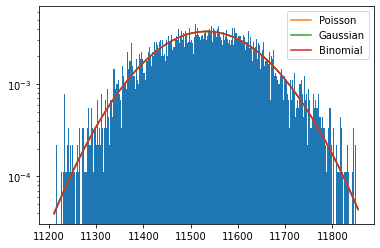

In [74]:
xmin = 0
xmax = 30
plt.hist(np.array(data1_cut2['cpm'])*5, range=(xmin,xmax), bins=xmax-xmin+1, density=True)
mu = np.mean(data1_cut2['cpm'])*5
print(mu)
x = np.array(range(xmin,xmax))
plt.plot(x, poisson.pmf(x, mu), label="Poisson")
plt.plot(x, norm.pdf(x, mu, np.sqrt(mu)), label="Gaussian")
N = len(data1_cut2['cpm'])*1000
p = mu/N
plt.plot(x, binom.pmf(x, N, p), label="Binomial")
plt.yscale('log')
plt.legend()
plt.show()

mu = np.mean(data2_cut['cpm'])*5
xmin = int(mu-3*np.sqrt(mu))
xmax = int(mu+3*np.sqrt(mu))
plt.hist(np.array(data2_cut['cpm'])*5, range=(xmin,xmax), bins=xmax-xmin+1, density=True)
print(mu)
x = np.array(range(xmin,xmax))
plt.plot(x, poisson.pmf(x, mu), label="Poisson")
plt.plot(x, norm.pdf(x, mu, np.sqrt(mu)), label="Gaussian")
N = len(data2_cut['cpm'])*1000
p = mu/N
plt.plot(x, binom.pmf(x, N, p), label="Binomial")
plt.yscale('log')
plt.legend()
plt.show()

### Question 2: (2pts)
### 2.a
##### If you are given a set of CPM measurements, `[20, 40, 18, 30, 45, 25, 35, 32]`, each taken over 10 minute intervals. Calculate the uncertainty on each measurement? (Remember that the CPM values are not the total counts measured.)

In [79]:
cpm_data = np.array([20, 40, 18, 30, 45, 25, 35, 32])
counts_data = cpm_data*10
counts_unc = np.sqrt(counts_data)
print("The uncertaintes on the counts-per-second are:")
cpm_unc = counts_unc/10
cpm_unc

The uncertaintes on the counts-per-second are:


array([1.41421356, 2.        , 1.34164079, 1.73205081, 2.12132034,
       1.58113883, 1.87082869, 1.78885438])

### 2.b
##### Are these measurements consistent? In other words, given the uncertainties you determined, is the variation between the measurements within those statistical uncertainties, or is something else required to explain the variation? Explain your answer.

In [82]:
exp_std = np.std(cpm_data)
print("measured standard deviation:",exp_std)
print("mean expected standard deviation from counting statistics",np.mean(cpm_unc))

measured standard deviation: 8.802520945729126
mean expected standard deviation from counting statistics 1.73125592568406


Because the measured variance and the expected variance from what we know about counting statistics are not close, it looks like these measurements are not statistically consistent.

### Question 3: (2pts)
### 3.a
##### Do the same as above with this set of CPM measurements, still taken over 10 minute intervals: 

```
[45, 48, 43, 44, 46, 42, 47, 40]
```

In [83]:
cpm_data = np.array([45, 48, 43, 44, 46, 42, 47, 40])
counts_data = cpm_data*10
counts_unc = np.sqrt(counts_data)
print("The uncertaintes on the counts-per-second are:")
cpm_unc = counts_unc/10
cpm_unc

The uncertaintes on the counts-per-second are:


array([2.12132034, 2.19089023, 2.07364414, 2.0976177 , 2.14476106,
       2.04939015, 2.16794834, 2.        ])

### 3.b
##### Are these variations explainable by your calculated statistical uncertainties?

In [84]:
exp_std = np.std(cpm_data)
print("measured standard deviation:",exp_std)
print("mean expected standard deviation from counting statistics",np.mean(cpm_unc))

measured standard deviation: 2.496873044429772
mean expected standard deviation from counting statistics 2.105696494533238


In this case the experimental variance (standard deviation) is much closer to the expected standard deviation from the counting statistics.